In [171]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import os
mpl.style.use('classic')

In [172]:
csv_path = "./dataset/Crime_Data_From_LA.csv"
df = pd.read_csv(csv_path)

In [173]:
df['Location'] = df['Location'].str.strip('()')
df['latitude'], df['longitude'] = df['Location'].str.split(',').str

In [174]:
df[['latitude', 'longitude']] = df[['latitude', 'longitude']].astype(float)

In [175]:
df = df[(df.latitude != 0) & (df.longitude != 0)]

In [176]:
df['Weapon Description']

0         STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
1                                                    NaN
2         STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
3                                               HAND GUN
4                                               HAND GUN
5         STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
6                                                    NaN
7                                                    NaN
8         STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
9         STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
10        STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
11        STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
12                                                   NaN
13                                                   NaN
14                                                   NaN
15                                                   NaN
16                                                   NaN
17                             

In [177]:
df['Area Name'].value_counts()

77th Street    14046
Southwest      12944
Pacific        10762
Southeast      10520
N Hollywood    10334
Mission         9874
Northeast       9684
Van Nuys        9426
Newton          9194
Olympic         9122
Topanga         8714
Devonshire      8547
Hollywood       8545
Rampart         8533
Central         8346
Harbor          8213
West LA         8145
West Valley     7949
Wilshire        7879
Foothill        7098
Hollenbeck      6862
Name: Area Name, dtype: int64

In [178]:
df['Weapon Description'].value_counts()

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    40488
UNKNOWN WEAPON/OTHER WEAPON                        5258
VERBAL THREAT                                      5198
HAND GUN                                           2887
KNIFE WITH BLADE 6INCHES OR LESS                   1006
SEMI-AUTOMATIC PISTOL                              1002
OTHER KNIFE                                         885
UNKNOWN FIREARM                                     720
VEHICLE                                             667
BOTTLE                                              450
STICK                                               432
REVOLVER                                            426
ROCK/THROWN OBJECT                                  399
FOLDING KNIFE                                       372
CLUB/BAT                                            371
BLUNT INSTRUMENT                                    355
KITCHEN KNIFE                                       345
MACE/PEPPER SPRAY                               

In [179]:
df["Weapon Used Code"] = df["Weapon Used Code"].fillna(0)

In [180]:
df["Victim Sex"] = df["Victim Sex"].fillna('F')

In [181]:
df['Victim Descent'] = df.fillna(df['Victim Descent'].value_counts().index[0])

In [182]:
df = df.dropna(axis=0, how='all')

In [183]:
df['Crime Code Description'].value_counts()

BATTERY - SIMPLE ASSAULT                                        18405
THEFT PLAIN - PETTY ($950 & UNDER)                              15753
BURGLARY                                                        13879
VEHICLE - STOLEN                                                13672
BURGLARY FROM VEHICLE                                           13096
THEFT OF IDENTITY                                               12916
INTIMATE PARTNER - SIMPLE ASSAULT                               11582
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114     9672
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                         9100
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                   8306
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)                  7781
ROBBERY                                                          6931
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036     6468
CRIMINAL THREATS - NO WEAPON DISPLAYED                           5809
SHOPLIFTING - PETTY 

In [186]:
df.head()

,Time Occurred,Area ID,Crime Code,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Weapon Used Code,Status Code,latitude,longitude
0,1500,18,310,48.0,M,141800508,501.0,SINGLE FAMILY DWELLING,400.0,IC,33.9438,-118.2695
1,2000,18,649,32.0,M,141800505,501.0,SINGLE FAMILY DWELLING,0.0,IC,34.1029,-118.3402
2,1930,18,626,50.0,F,141800504,501.0,SINGLE FAMILY DWELLING,400.0,AA,33.9447,-118.2739
3,2300,18,230,28.0,M,141800503,102.0,SIDEWALK,102.0,IC,33.9332,-118.2485
4,1430,18,210,48.0,F,141800501,101.0,STREET,102.0,IC,33.9587,-118.2666


In [187]:
df['Premise Description'] = df['Premise Description'].astype('category')

In [188]:
df['Status Code'] = df['Status Code'].astype('category')

In [189]:
df['Victim Descent'] = df['Victim Descent'].astype('category')

In [190]:
corr_matrix = df.corr()
corr_matrix

,Time Occurred,Area ID,Crime Code,Victim Age,Premise Code,Weapon Used Code,latitude,longitude
Time Occurred,1.000000,0.008834,0.022940,-0.055596,-0.096446,-0.001681,0.004764,-0.005048
Area ID,0.008834,1.000000,-0.003226,0.003722,0.015366,-0.019252,0.363589,-0.441576
Crime Code,0.022940,-0.003226,1.000000,-0.040082,0.091917,0.152785,0.006245,0.015809
Victim Age,-0.055596,0.003722,-0.040082,1.000000,0.166697,-0.032508,0.040822,-0.082411
Premise Code,-0.096446,0.015366,0.091917,0.166697,1.000000,0.051972,0.031405,-0.072289
Weapon Used Code,-0.001681,-0.019252,0.152785,-0.032508,0.051972,1.000000,-0.087134,0.116565
latitude,0.004764,0.363589,0.006245,0.040822,0.031405,-0.087134,1.000000,-0.587408
longitude,-0.005048,-0.441576,0.015809,-0.082411,-0.072289,0.116565,-0.587408,1.000000


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


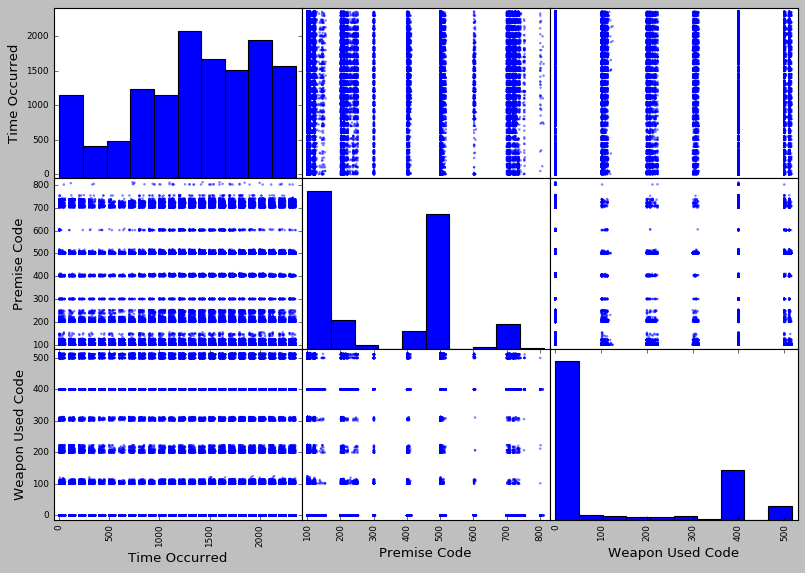

In [191]:
from pandas.tools.plotting import scatter_matrix
attributes = ["Time Occurred", "Premise Code", "Weapon Used Code"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

In [192]:
df['Premise Description'].value_counts()

SINGLE FAMILY DWELLING                          41075
STREET                                          40614
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    26429
PARKING LOT                                     13435
SIDEWALK                                        10121
OTHER BUSINESS                                   8638
VEHICLE, PASSENGER/TRUCK                         7679
DRIVEWAY                                         3565
GARAGE/CARPORT                                   3459
DEPARTMENT STORE                                 3076
RESTAURANT/FAST FOOD                             2534
MARKET                                           2008
OTHER STORE                                      1614
PARK/PLAYGROUND                                  1411
YARD (RESIDENTIAL/BUSINESS)                      1372
HIGH SCHOOL                                      1362
PARKING UNDERGROUND/BUILDING                     1281
OTHER PREMISE                                    1266
ALLEY                       

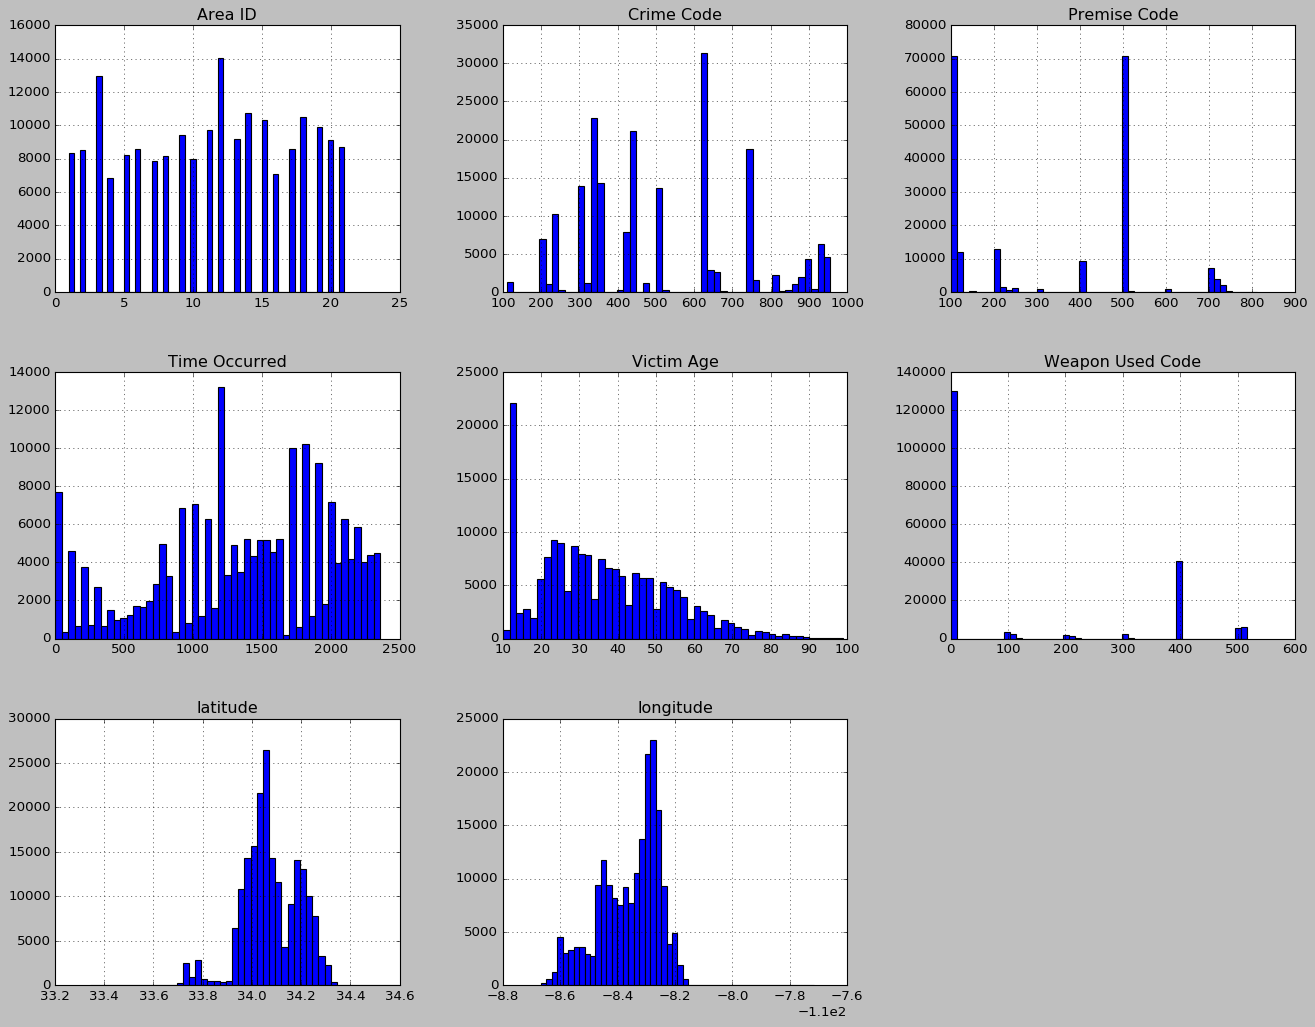

In [193]:
import matplotlib.pyplot as plt 
df.hist(bins=50, figsize=(20,15)) 
plt.show()

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194737 entries, 0 to 194888
Data columns (total 12 columns):
Time Occurred          194737 non-null int64
Area ID                194737 non-null int64
Crime Code             194737 non-null int64
Victim Age             181951 non-null float64
Victim Sex             192260 non-null category
Victim Descent         194737 non-null category
Premise Code           194734 non-null float64
Premise Description    194609 non-null category
Weapon Used Code       194737 non-null float64
Status Code            194737 non-null category
latitude               194737 non-null float64
longitude              194737 non-null float64
dtypes: category(4), float64(5), int64(3)
memory usage: 21.3 MB


In [195]:
from geopandas import GeoDataFrame
from geopandas.tools import sjoin
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip( df.longitude, df.latitude)]
crs = {'init': 'epsg:4326'}
geodf = GeoDataFrame(df, crs=crs, geometry=geometry)
geodf.head()

,Time Occurred,Area ID,Crime Code,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Weapon Used Code,Status Code,latitude,longitude,geometry
0,1500,18,310,48.0,M,141800508,501.0,SINGLE FAMILY DWELLING,400.0,IC,33.9438,-118.2695,POINT (-118.2695 33.9438)
1,2000,18,649,32.0,M,141800505,501.0,SINGLE FAMILY DWELLING,0.0,IC,34.1029,-118.3402,POINT (-118.3402 34.1029)
2,1930,18,626,50.0,F,141800504,501.0,SINGLE FAMILY DWELLING,400.0,AA,33.9447,-118.2739,POINT (-118.2739 33.9447)
3,2300,18,230,28.0,M,141800503,102.0,SIDEWALK,102.0,IC,33.9332,-118.2485,POINT (-118.2485 33.9332)
4,1430,18,210,48.0,F,141800501,101.0,STREET,102.0,IC,33.9587,-118.2666,POINT (-118.2666 33.9587)


In [205]:
census = GeoDataFrame.from_file('./dataset/census-tracts-2012.geojson') 
census = census[['geometry', 'name']]

In [197]:
geodf_with_census = sjoin(geodf, census, how="inner", op='intersects')

In [198]:
geodf_with_census['TractFIPS'] = geodf_with_census['name'].str[1:].astype(float)
geodf_with_census.head()

,Time Occurred,Area ID,Crime Code,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Weapon Used Code,Status Code,latitude,longitude,geometry,index_right,name,TractFIPS
0,1500,18,310,48.0,M,141800508,501.0,SINGLE FAMILY DWELLING,400.0,IC,33.9438,-118.2695,POINT (-118.2695 33.9438),804,06037240600,6.037241e+09
290,2200,18,210,35.0,F,141804047,102.0,SIDEWALK,400.0,AO,33.9502,-118.2695,POINT (-118.2695 33.9502),804,06037240600,6.037241e+09
293,1830,18,624,46.0,F,141804042,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,AO,33.9483,-118.2695,POINT (-118.2695 33.9483),804,06037240600,6.037241e+09
294,2200,18,624,42.0,M,141804041,101.0,STREET,400.0,AO,33.9492,-118.2695,POINT (-118.2695 33.9492),804,06037240600,6.037241e+09
535,1700,18,624,32.0,F,141804058,122.0,"VEHICLE, PASSENGER/TRUCK",400.0,IC,33.9465,-118.2695,POINT (-118.2695 33.9465),804,06037240600,6.037241e+09


In [199]:
health = pd.read_csv('./dataset/500_Cities__Physical_health_not_good_for___14_days_among_adults_aged___18_years.csv',thousands=',') 

In [200]:
health = health[['TractFIPS', 'PopulationCount', 'Data_Value']]
health = health.dropna(axis=0, how='any')

In [201]:
geo_census_health = geodf_with_census.merge(health, on='TractFIPS')

In [202]:
geo_census_health = geo_census_health.drop('name', 1)
# geo_census_health = geo_census_health.drop('geometry', 1)
geo_census_health = geo_census_health.drop('index_right', 1)

In [203]:
geo_census_health = geo_census_health.dropna(axis=0, how='any')
geo_census_health.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 177562 entries, 0 to 190705
Data columns (total 16 columns):
Time Occurred          177562 non-null int64
Area ID                177562 non-null int64
Crime Code             177562 non-null int64
Victim Age             177562 non-null float64
Victim Sex             177562 non-null category
Victim Descent         177562 non-null category
Premise Code           177562 non-null float64
Premise Description    177562 non-null category
Weapon Used Code       177562 non-null float64
Status Code            177562 non-null category
latitude               177562 non-null float64
longitude              177562 non-null float64
geometry               177562 non-null object
TractFIPS              177562 non-null float64
PopulationCount        177562 non-null int64
Data_Value             177562 non-null float64
dtypes: category(4), float64(7), int64(4), object(1)
memory usage: 25.5+ MB


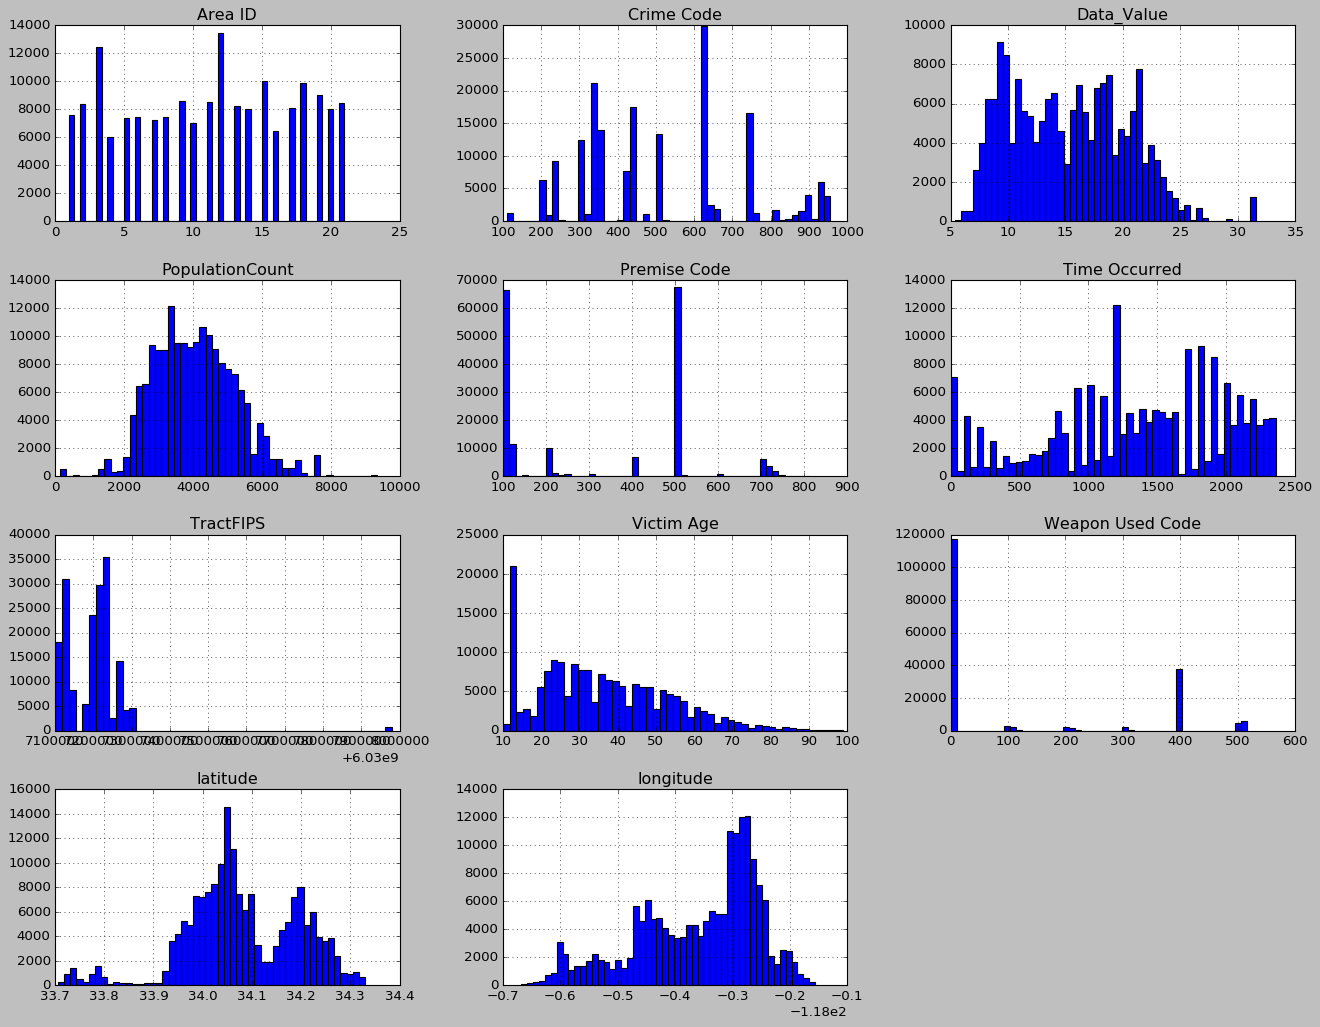

In [204]:
geo_census_health.hist(bins=50, figsize=(20,15)) 
plt.show()

In [ ]:
geo_census_health = geo_census_health.drop('geometry', 1)
geo_census_health.info()

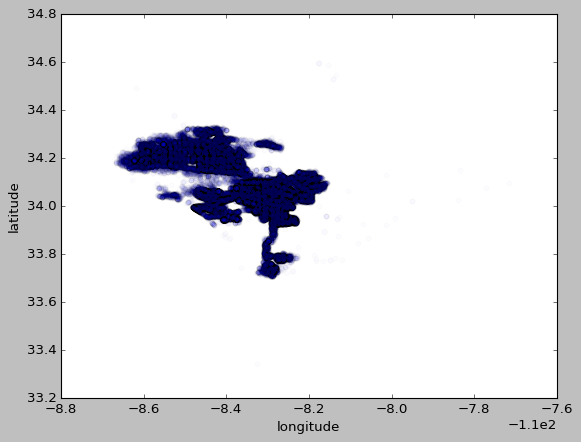

In [236]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.style.use('classic')
df.plot(kind="scatter", y='latitude', x='longitude', alpha=0.01)
plt.show()

In [248]:
df = geo_census_health

In [249]:
df

,Time Occurred,Area ID,Crime Code,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Weapon Used Code,Status Code,latitude,longitude,TractFIPS,PopulationCount,Data_Value
0,1500,18,310,48.0,M,141800508,501.0,SINGLE FAMILY DWELLING,400.0,IC,33.9438,-118.2695,6.037241e+09,4932,21.5
1,2200,18,210,35.0,F,141804047,102.0,SIDEWALK,400.0,AO,33.9502,-118.2695,6.037241e+09,4932,21.5
2,1830,18,624,46.0,F,141804042,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,AO,33.9483,-118.2695,6.037241e+09,4932,21.5
3,2200,18,624,42.0,M,141804041,101.0,STREET,400.0,AO,33.9492,-118.2695,6.037241e+09,4932,21.5
4,1700,18,624,32.0,F,141804058,122.0,"VEHICLE, PASSENGER/TRUCK",400.0,IC,33.9465,-118.2695,6.037241e+09,4932,21.5
5,1100,18,510,12.0,F,141804025,101.0,STREET,0.0,IC,33.9483,-118.2695,6.037241e+09,4932,21.5
6,2257,18,648,13.0,M,141804019,203.0,OTHER BUSINESS,0.0,IC,33.9456,-118.2695,6.037241e+09,4932,21.5
7,2330,18,510,13.0,F,141804131,101.0,STREET,0.0,IC,33.9456,-118.2695,6.037241e+09,4932,21.5
8,2330,18,510,13.0,F,141804130,104.0,DRIVEWAY,0.0,IC,33.9456,-118.2695,6.037241e+09,4932,21.5
9,1400,18,310,39.0,M,141804178,501.0,SINGLE FAMILY DWELLING,0.0,IC,33.9456,-118.2695,6.037241e+09,4932,21.5


In [250]:
df = df.drop(["Status Code", "Victim Sex", "Premise Description"], 1)
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 177562 entries, 0 to 190705
Data columns (total 12 columns):
Time Occurred       177562 non-null int64
Area ID             177562 non-null int64
Crime Code          177562 non-null int64
Victim Age          177562 non-null float64
Victim Descent      177562 non-null category
Premise Code        177562 non-null float64
Weapon Used Code    177562 non-null float64
latitude            177562 non-null float64
longitude           177562 non-null float64
TractFIPS           177562 non-null float64
PopulationCount     177562 non-null int64
Data_Value          177562 non-null float64
dtypes: category(1), float64(7), int64(4)
memory usage: 28.4 MB


In [257]:
from sklearn.ensemble  import RandomForestRegressor
lin_reg = RandomForestRegressor() 
target = df['Data_Value']
data = df.drop(['Data_Value'], axis=1)
lin_reg.fit(data, target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [258]:
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, data, target, cv=5)
lin_scores

array([ 0.739703  , -0.03769426,  0.57840249,  0.53627392,  0.66744759])

In [ ]:
from mapbox import Uploader

In [ ]:
service = Uploader()
from time import sleep
from random import randint

In [ ]:
service = Uploader(access_token='sk.eyJ1Ijoic3VwbGl0cyIsImEiOiJjajV1eGN3bTcwZDhzMndudGFyNTBxbXJuIn0.6mrx1bRfCf6Q6Sik-8JA_w')

with open('dataset/upload.csv', 'rb') as src:
    upload_resp = service.upload(src, 'test')

In [ ]:
if upload_resp.status_code == 422:
    for i in range(5):
        sleep(5)
        with open('dataset/upload.csv', 'rb') as src:
            pload_resp = service.upload(src, 'test')
            if upload_resp.status_code != 422:
                break

In [ ]:
upload_resp.status_code

In [ ]:
phlth = "./dataset/500_Cities__Physical_health_not_good_for___14_days_among_adults_aged___18_years.csv"
df2 = pd.read_csv(phlth)
df2

In [ ]:
df2['GeoLocation'] = df2['GeoLocation'].str.strip('()')
df2['Latitude'], df2['Longitude'] = df2['GeoLocation'].str.split(',').str
df2

In [ ]:
df2[['Latitude', 'Longitude']] = df2[['Latitude', 'Longitude']].astype(float)

In [ ]:
upload_resp.status_code

In [ ]:
df2.to_csv("./dataset/upload2.csv")